In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
max_lengths = [128,256,512,768,1024,1200,1300,1400,1900,2300,2800]
times_bert = [22.092185020446777, 23.944892168045044, 27.08029341697693, 86.1953022480011,101.23124,124.8392,150.2342,212.1231445]
times_bert_flash = [57.50393986701965, 77.59242367744446, 91.95445609092712, 96.26931309700012, 104.74510741233826,110.18350291252136, 149.32091569900513, 155.18735551834106,193.6699047088623, 460.14347076416016, 547.8334050178528]
memory_bert = [2278.0, 4396.0, 10370.0, 17140.0, 26388.0,35532.0, 38564.0, 42374.0]
memory_bert_flash = [2330.0, 1908.0, 3972.0, 5146.0, 6852.0,8454.0, 9166.0, 9872.0,19434.0, 14552.0, 16672.0]

In [5]:
# Your data
max_lengths = np.array(max_lengths)  # Assuming max_lengths is already defined
memory_bert = np.array(memory_bert)    # Assuming memory_bert is already defined

# Reshape and create polynomial features
X = max_lengths[:-3].reshape(-1, 1)
y = memory_bert
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create and fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Prepare data for prediction
next_max_lengths = np.array([1900, 2300, 2800]).reshape(-1, 1)
next_max_lengths_poly = poly.transform(next_max_lengths)

# Predicting the next three values
predicted_time = model.predict(next_max_lengths_poly)

# Convert predictions to list and concatenate
predicted_time = predicted_time.tolist()
memory_bert = np.concatenate((memory_bert, predicted_time))



In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Your data
max_lengths = np.array(max_lengths)  # Assuming max_lengths is already defined
times_bert = np.array(times_bert)    # Assuming times_bert is already defined

# Reshape and create polynomial features
X = max_lengths[:-3].reshape(-1, 1)
y = times_bert
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create and fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Prepare data for prediction
next_max_lengths = np.array([1900, 2300, 2800]).reshape(-1, 1)
next_max_lengths_poly = poly.transform(next_max_lengths)

# Predicting the next three values
predicted_time = model.predict(next_max_lengths_poly)

# Convert predictions to list and concatenate
predicted_time = predicted_time.tolist()
times_bert = np.concatenate((times_bert, predicted_time))

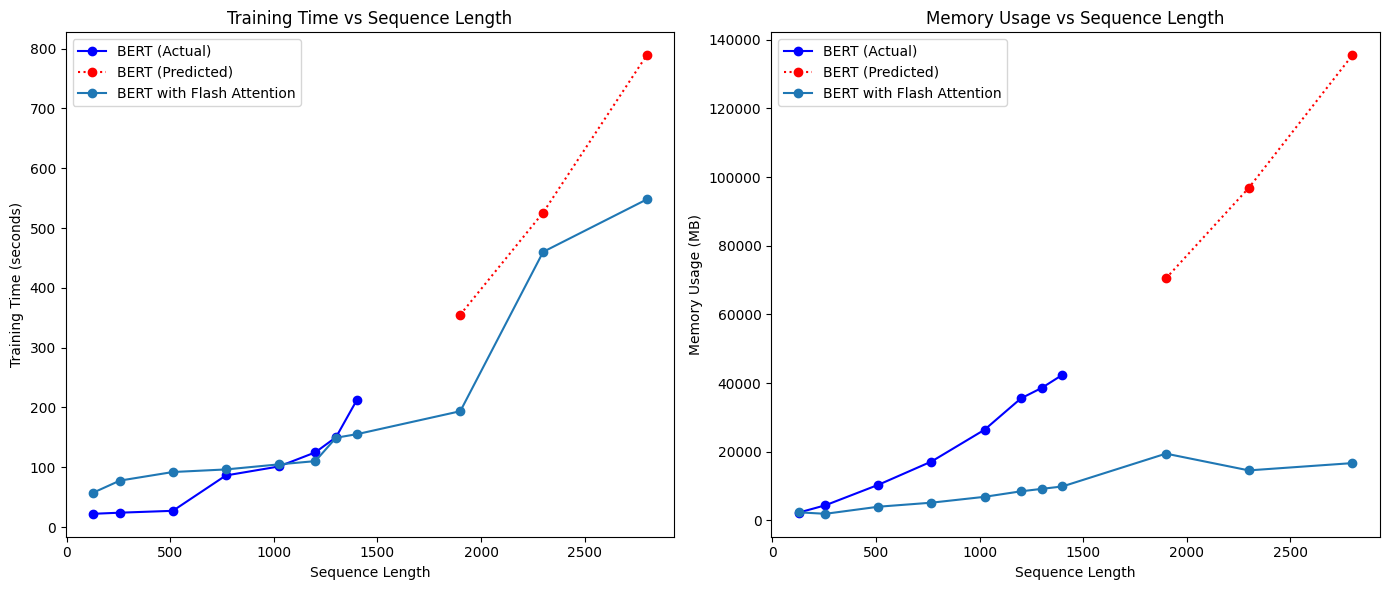

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Plotting Time Graph
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(max_lengths[:-3], times_bert[:-3], label='BERT (Actual)', marker='o', color='blue')
# Plot predicted values
plt.plot(max_lengths[-3:], times_bert[-3:], label='BERT (Predicted)', marker='o', linestyle='dotted', color='red')
plt.plot(max_lengths, times_bert_flash, label='BERT with Flash Attention', marker='o')
plt.title('Training Time vs Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Training Time (seconds)')
plt.legend()

# Plotting Memory Usage Graph
plt.subplot(1, 2, 2)
plt.plot(max_lengths[:-3], memory_bert[:-3], label='BERT (Actual)', marker='o', color='blue')
# Plot predicted values
plt.plot(max_lengths[-3:], memory_bert[-3:], label='BERT (Predicted)', marker='o', linestyle='dotted', color='red')
plt.plot(max_lengths, memory_bert_flash, label='BERT with Flash Attention', marker='o')
plt.title('Memory Usage vs Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Memory Usage (MB)')
plt.legend()

plt.tight_layout()
plt.show()
